In [20]:
import gradio as gr
import joblib as jb
import numpy as np
import pandas as pd
import pickle as pk
import seaborn as sns
import sklearn.cluster as cluster
import warnings
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from IPython.display import Image
from kneed import KneeLocator
from matplotlib import pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

In [21]:
from sklearn.datasets import make_classification

In [22]:
x, y = make_classification(n_samples = 10000, n_features = 30)

In [23]:
x.shape

(10000, 30)

In [24]:
pd.DataFrame(y)

,0
0,1
1,0
2,0
3,1
4,1
...,...
9995,0
9996,0
9997,0
9998,1


In [25]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.410207,0.015028,-0.925967,-1.328842,-0.400867,0.135744,-0.344518,-0.805718,-0.328900,0.087140,...,-0.199969,1.391988,0.806959,-0.560012,0.887504,1.614435,-0.150670,-0.916212,0.378611,0.440640
1,-0.103706,0.020118,0.199784,-0.539697,-1.215980,1.184640,-0.632136,0.397229,-0.407660,-2.129298,...,1.068053,0.569655,0.155492,-1.651653,-0.028774,2.175221,2.293882,0.809549,-0.505127,-0.362851
2,-0.255828,-1.186058,-0.327731,0.463941,1.762376,-0.525429,0.116275,-0.507762,-0.065256,-0.902523,...,0.506069,1.695436,0.462273,0.073928,0.003408,-0.518715,-1.948658,1.005588,0.139396,-1.217553
3,-0.321768,0.682107,0.283593,-1.342070,-0.215500,-0.734380,-1.442269,0.168585,0.269650,-0.642343,...,-1.245365,0.088816,-0.144208,0.251318,0.496020,-0.223268,-0.141959,-1.375708,-1.463963,1.790375
4,0.692353,-0.602844,0.101051,0.080597,0.074119,-0.326662,-0.117297,-0.804472,-0.162052,-0.242817,...,1.041938,0.341965,1.087227,-1.445180,0.980220,-0.213126,0.462299,-1.199397,-0.441680,-0.672783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.555906,-2.266395,-0.637668,-0.188153,-0.651042,-0.929739,-0.197439,-0.221793,-1.541643,-0.251780,...,1.828645,-0.714633,0.578518,0.134906,-0.789298,-0.359061,1.487711,0.791774,1.406343,1.692025
9996,2.963573,-0.760098,-0.913642,-1.313630,-0.131512,0.233396,1.495985,-0.475714,1.987172,0.608825,...,1.361567,-1.570557,-0.399759,0.506917,-1.169579,1.482015,0.292464,-0.150773,0.200134,-0.402053
9997,0.063220,0.546760,0.064504,-0.787109,-0.033157,1.489240,-0.427448,-2.326569,0.031706,-1.485862,...,-0.693483,-0.062693,-1.379830,0.428521,-0.310986,0.426802,-0.553289,0.249380,1.204364,0.901127
9998,0.317856,0.355683,0.221432,-0.597248,0.936758,-1.069945,0.525583,2.061653,0.312248,-2.005171,...,-1.530510,0.222831,-0.421603,0.491557,1.590446,0.611775,-0.554170,-1.447274,-0.343282,-0.716652


In [26]:
from sklearn.model_selection import train_test_split as tts

In [27]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 3000, random_state = 42)

In [28]:
xtest.shape

(3000, 30)

In [29]:
ytest.shape

(3000,)

In [30]:
train_score = []
test_score = []

In [31]:
max_depth = [n for n in range(1, 30)]
max_depth

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [32]:
for depth in max_depth:
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(xtrain, ytrain)
    
    # training accuracy
    train_acc = clf.score(xtrain, ytrain)
    train_score.append(train_acc)
    
    #test accuracy
    test_acc = clf.score(xtest, ytest)
    test_score.append(test_acc)
    
    print('Max Depth = %d, Trainig Accuracy = %f, Test Accuracy = %f' %(depth, train_acc, test_acc))

Max Depth = 1, Trainig Accuracy = 0.914714, Test Accuracy = 0.930667
Max Depth = 2, Trainig Accuracy = 0.962857, Test Accuracy = 0.965333
Max Depth = 3, Trainig Accuracy = 0.962857, Test Accuracy = 0.966000
Max Depth = 4, Trainig Accuracy = 0.965429, Test Accuracy = 0.967333
Max Depth = 5, Trainig Accuracy = 0.966714, Test Accuracy = 0.969000
Max Depth = 6, Trainig Accuracy = 0.970714, Test Accuracy = 0.961000
Max Depth = 7, Trainig Accuracy = 0.974571, Test Accuracy = 0.960667
Max Depth = 8, Trainig Accuracy = 0.979143, Test Accuracy = 0.958000
Max Depth = 9, Trainig Accuracy = 0.983429, Test Accuracy = 0.961333
Max Depth = 10, Trainig Accuracy = 0.987714, Test Accuracy = 0.958333
Max Depth = 11, Trainig Accuracy = 0.990571, Test Accuracy = 0.954667
Max Depth = 12, Trainig Accuracy = 0.992714, Test Accuracy = 0.955000
Max Depth = 13, Trainig Accuracy = 0.994714, Test Accuracy = 0.950333
Max Depth = 14, Trainig Accuracy = 0.995429, Test Accuracy = 0.954333
Max Depth = 15, Trainig Accur

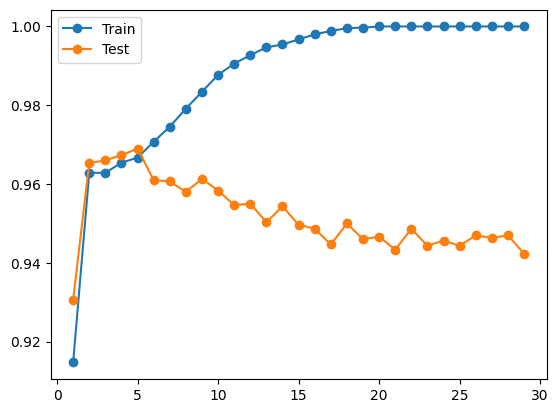

In [33]:
plt.plot(max_depth, train_score, '-o', label = 'Train')
plt.plot(max_depth, test_score, '-o', label = 'Test')
plt.legend()